In [1]:
##################################
# import libraries

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage.io
import skimage.util
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import scipy.ndimage
from skimage.transform import rescale, resize, downscale_local_mean
import tensorflow as tf
from skimage.measure import profile_line


from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nrmse


scaler = MinMaxScaler()

C:\ProgramData\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def normalize_volume(GT_image):
    clipped_data = GT_image.copy() # at channel 0
    clipped_data[clipped_data<0] = 0    #thresholding
    apodized_data = clipped_data - np.min(clipped_data)
    norm_3D_data = apodized_data/np.max(apodized_data)
    return norm_3D_data

In [3]:
os.getcwd()

'E:\\Bereket\\Research\\DeepLearning - 3D\\Thesis\\Results\\Figure Trained on Opstad and Tested on Opstad'

In [4]:
my_list = UNET_3D, Ground_Truth, UNET_2D, Fair_SIM, Wide_Field = [r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_3D_7\add\config_3\full\UNet_SIM3_3D_Data_3D_7_epoch_400_batch_8_lr_ryan_0.0001\Stitched_pred_stitched.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\017\ground_truth_017.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_2D_7\add\config_5\full\UNet_SIM_3_epoch_500_batch_8_lr_0.001_luhong\pred_stitched.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\017\FairSIM.tif",
                                                                  r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_pre_processed\Opstad\Live Cell\017\wide_field_017.tif"]

In [5]:
second_list = []
for i in my_list:
    second_list.append(io.imread(i))

In [6]:
my_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure Trained on Opstad and Tested on Opstad\new_axis_512.png")
my_z_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\Figure Best FairSIM\new_axis_z.png")

In [7]:
for i in second_list:
    print(i.shape)

(18, 512, 512)
(32, 512, 512)
(18, 512, 512)
(9, 512, 512)
(32, 256, 256)


In [8]:
second_list[0] = second_list[0][0:18,:,:]
second_list[1] = scipy.ndimage.zoom(second_list[1][0:9,:,:], zoom = (2,1,1), order =1)
second_list[3] = normalize_volume(scipy.ndimage.zoom(second_list[3][0:9,:,:], zoom = (2,1,1), order =1))
second_list[4] = scipy.ndimage.zoom(second_list[4][0:9,:,:], zoom = (2,2,2), order =1)

In [9]:
for i in second_list:
    print(i.shape)

(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 512, 512)
(18, 512, 512)


In [10]:
class MinMaxScaler3D(MinMaxScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

In [11]:
scaler_3D = MinMaxScaler3D(clip=True)

In [12]:
secondd_list = []
for i in range(5):
    secondd_list.append(scaler_3D.fit_transform(second_list[i]))

In [13]:
seconddd_list = []
for i in range(5):
    seconddd_list.append(normalize_volume(second_list[i]))

In [14]:
def ssim_batch(img1, img2):
    img1 = (img1*255).astype("uint8")
    img2 = (img2*255).astype("uint8")
    return ssim(img1,img2)

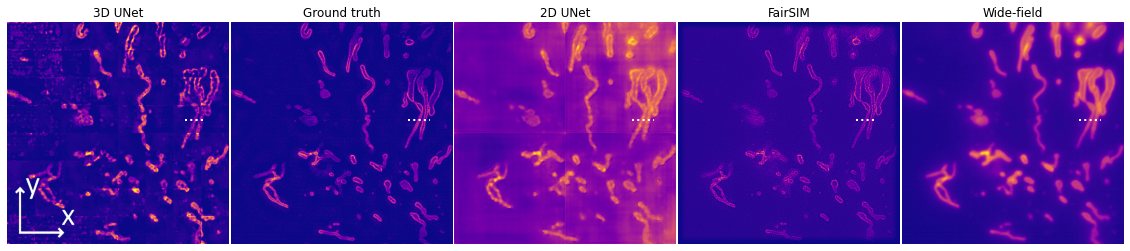

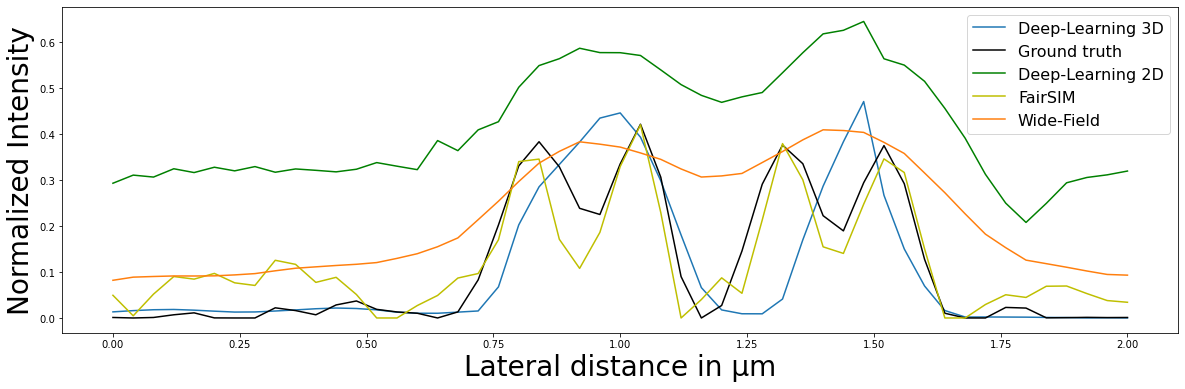

In [15]:
######
# profile line setup

# movey from the center
length = 50
move_x = 410
move_y = -30 

slide = 7

# profile line
start_2 = (seconddd_list[0][slide,:,:].shape[0]//2 + move_y,move_x)
end_2 = (seconddd_list[0][slide,:,:].shape[0]//2+move_y, move_x+length)

###############

columns = 5
rows = 1

fig, ax = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures
plt.axis('off')

slide = 2
for i in range(5):
    ax[i].imshow(normalize_volume(seconddd_list[i][slide]), cmap = 'plasma')
    ax[i].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w:', lw=2) #Plot a red line across the film

for i in range(5):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)
ax[0].imshow(my_axis)

ax[0].set_title('3D UNet')
ax[1].set_title('Ground truth')
ax[2].set_title('2D UNet')
ax[3].set_title('FairSIM')
ax[4].set_title('Wide-field')



################################################################
# intensity plot
    
profile = profile_line(seconddd_list[0][slide,:,:], start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(seconddd_list[1][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(seconddd_list[2][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(seconddd_list[3][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 
profile_5 = profile_line(seconddd_list[4][slide,:,:], start_2, end_2, linewidth=1, mode='constant') 



fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'k-')
ax_2.plot(x1,profile_3, 'g-')
ax_2.plot(x1,profile_4, 'y-')
ax_2.plot(x1,profile_5)

# ax_2.plot(x1,profile_dic['UNET_3D'])
# ax_2.plot(x1,profile_dic['UNET_2D'], 'g-')
# ax_2.plot(x1,profile_dic['Ground_Truth'], 'k-')
# ax_2.plot(x1,profile_dic['Wide_Field'], 'y-')


# ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Ground truth', 'Deep-Learning 2D','FairSIM','Wide-Field'],  fontsize=16, loc='upper right')

#fig.savefig('comparison.png') 

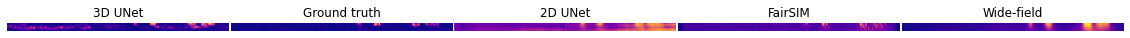

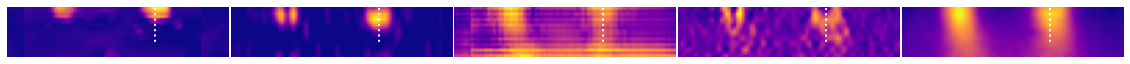

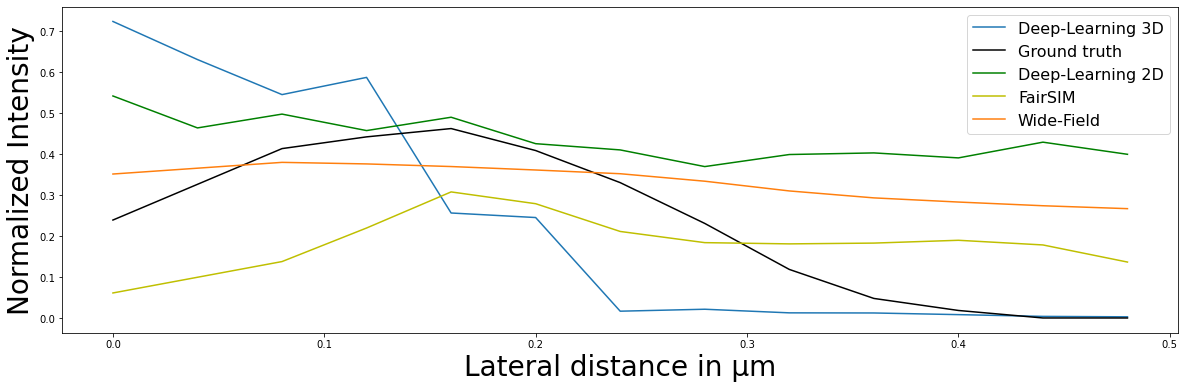

In [53]:
columns = 5
rows = 1

#######################################################################
fig_3, ax_3 = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures

plt.axis('off')
slide = 10
x_range = slice(300,350)
y_range = 450
for i in range(5):
    ax_3[i].imshow(normalize_volume(seconddd_list[i][:,y_range,:]), cmap='plasma')
for i in range(5):
    ax_3[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

ax_3[0].set_title('3D UNet')
ax_3[1].set_title('Ground truth')
ax_3[2].set_title('2D UNet')
ax_3[3].set_title('FairSIM')
ax_3[4].set_title('Wide-field')

########################################################################
fig, ax = plt.subplots(rows, columns, figsize=(20, 10)) # setup the figures

plt.axis('off')
slide = 10
# x_range = slice(300,350)
# y_range = 200

x_range = slice(250,330)
y_range = 100

length = 12
x_movt = 53
y_start = 0

start_2 = (y_start,x_movt)
end_2 = (y_start+length, x_movt)

for i in range(5):  
    ax[i].imshow(normalize_volume(seconddd_list[i][:,y_range,x_range]), cmap = 'plasma')
    ax[i].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w:', lw=2) #Plot a red line across the film
        
for i in range(5):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

###########################
# intensity plot
    
profile = profile_line(seconddd_list[0][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') #Take the profile line
profile_2 = profile_line(seconddd_list[1][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_3 = profile_line(seconddd_list[2][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_4 = profile_line(seconddd_list[3][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
profile_5 = profile_line(seconddd_list[4][:,y_range,x_range], start_2, end_2, linewidth=1, mode='constant') 
    
################################################################
fig_2, ax_2 = plt.subplots(1, 1, figsize=(20, 6)) #Create the figures


#x1 = np.linspace(0, length, length+1, endpoint=True)*(40.96um/1024) #calibration to um using GT image info
x1 = np.linspace(0, length, length+1, endpoint=True)*(0.08/2) # (80nm/2) calibration to um using info from MBPC paper

ax_2.plot(x1,profile)
ax_2.plot(x1,profile_2, 'k-')
ax_2.plot(x1,profile_3, 'g-')
ax_2.plot(x1,profile_4, 'y-')
ax_2.plot(x1,profile_5)
# ax_2.grid()

plt.xlabel("Lateral distance in μm", fontsize=28)
plt.ylabel("Normalized Intensity", fontsize=28)
ax_2.legend(['Deep-Learning 3D', 'Ground truth', 'Deep-Learning 2D','FairSIM','Wide-Field'],  fontsize=16, loc='upper right')

In [24]:
def ssim_batch(img1, img2):
    img1 = (img1*255).astype(np.int16)
    img2 = (img2*255).astype(np.int16)
#     img1 = (img1*255).astype("uint8")
#     img2 = (img2*255).astype("uint8")
#     img1 = (img1*255).astype("float16")
#     img2 = (img2*255).astype("float16")
    return ssim(img1,img2)

## Volume Table

In [25]:
# FOR 3d

# print('psnr: ',psnr(second_list[0],second_list[1]))
# print('ssim: ',ssim_batch(second_list[0]/np.max(second_list[0]), second_list[1]/np.max(second_list[1])) )

In [44]:
# FOR 3d

print('psnr: ',psnr(seconddd_list[0],seconddd_list[1]))
print('ssim: ',ssim_batch(seconddd_list[0],seconddd_list[1]))

psnr:  19.32486026694033
ssim:  0.23673736451341332


In [43]:
# FOR 2d

print('psnr: ',psnr(seconddd_list[2],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[2],seconddd_list[1]))

psnr:  11.077261717098587
ssim:  0.08275743018016941


## Local Comparison
--------

## Lateral 

In [48]:
# FOR 2d

print('psnr: ',psnr(secondd_list[2][slide],secondd_list[1][slide]))
print('ssim: ',ssim(secondd_list[2][slide],secondd_list[1][slide]))

psnr:  11.207017485468846
ssim:  0.11109852170142907


In [49]:
# FOR 3d

print('psnr: ',psnr(secondd_list[1][slide],secondd_list[0][slide]))
print('ssim: ',ssim(secondd_list[1][slide],secondd_list[0][slide]))


im1 =tf.image.convert_image_dtype(secondd_list[2], tf.float32)
im2 =tf.image.convert_image_dtype(secondd_list[1], tf.float32)
error_tf_ssim = float(tf.image.ssim(im1, im2, max_val=1, filter_size=11))
print(float(tf.image.ssim(im1, im2, max_val=1, filter_size=11)))

psnr:  15.495297959795227
ssim:  0.3121526138666651
0.07562854140996933


In [35]:
# FOR FairSIM

print('psnr: ',psnr(second_list[3][slide],second_list[1][slide]))
print('ssim: ',ssim(second_list[3][slide],second_list[1][slide]))

# print('psnr: ',psnr(second_list[3][8]/np.max(second_list[3][8]),second_list[1][8])/np.max(second_list[1][8]))
# print('ssim: ',ssim(second_list[3][8]/np.max(second_list[3][8]),second_list[1][8])/np.max(second_list[1][8]))

psnr:  12.037491121985191
ssim:  0.06789857953144302


## Axial 

In [38]:
# FOR 2d

print('psnr: ',psnr(secondd_list[1][:,y_range,x_range],secondd_list[2][:,y_range,x_range] ) )
print('ssim: ',ssim(secondd_list[1][:,y_range,x_range],secondd_list[2][:,y_range,x_range] ) )

psnr:  8.39456730672374
ssim:  0.11619384106788726


In [35]:
# FOR 3d

print('psnr: ',psnr(secondd_list[1][:,y_range,x_range],secondd_list[0][:,y_range,x_range]) )
print('ssim: ',ssim(second_list[1][:,y_range,x_range],second_list[0][:,y_range,x_range]) )

psnr:  16.26208970485043
ssim:  0.38813776757010626


In [36]:
print('psnr: ',psnr(second_list[3][:,y_range,x_range],second_list[1][:,y_range,x_range]) )
print('ssim: ',ssim(second_list[3][:,y_range,x_range],second_list[1][:,y_range,x_range]) )

# print('psnr: ',psnr(secondd_list[3],secondd_list[1], data_range=1.0))
# print('ssim: ',ssim(second_list[3]/np.max(second_list[3]),second_list[1], data_range=1.0))

psnr:  11.326424154555681
ssim:  0.19771014187079614
